In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [203]:
df = data = pd.read_csv("CleanData/2017/data.csv")
df.sample(5)

# Afficher les prédictions
count = df['Tendance'].value_counts()

print(count)

Tendance
droite    10563
centre     3598
gauche     1476
Name: count, dtype: int64


In [204]:

loire = df.loc[df['Code du département'] == '44']


loire.to_csv("./CleanData/loire.csv");

df = data.drop(data[data['Code du département'] == '44'].index)

df = df.drop([
'codgeo',
'Libellé de la commune',
'Nom Gagnant',
'Prénom Gagnant',
'Code du département',
'Libellé du département',
'Code de la commune',
'Prenom','Nom',
'Code Tendance',
'Parti polititque'], axis=1)

print(df.Tendance.unique())


Tendance
centre    101
droite     41
gauche     26
Name: count, dtype: int64
['droite' 'gauche' 'centre']


In [205]:
dummy = pd.get_dummies (df ['Tendance'])
df = pd.concat( [df, dummy ], axis = 1)
df = df.drop( ['Tendance'], axis = 1)

display(df)


,rsa,Niveau de vie,Nombre de ménages fiscaux,Nombre de chômeurs de 15 à 64 ans,total_allocataires,centre,droite,gauche
0,7.0,17420.0,122.0,10.043103,30,False,True,False
1,7.0,17420.0,122.0,10.043103,30,False,False,True
2,18.0,21400.0,928.0,105.374090,351,False,True,False
3,18.0,21400.0,928.0,105.374090,351,False,True,False
4,18.0,19330.0,455.0,50.000000,134,False,True,False
...,...,...,...,...,...,...,...,...
15632,13.0,24620.0,488.0,41.209827,194,False,True,False
15633,9.0,25630.0,206.0,23.587935,72,False,True,False
15634,6.0,30040.0,329.0,34.853796,89,False,True,False
15635,49.0,16500.0,286.0,85.519376,138,False,True,False


## Visualisation

<Axes: title={'center': 'Correlation matrix heatmap'}>

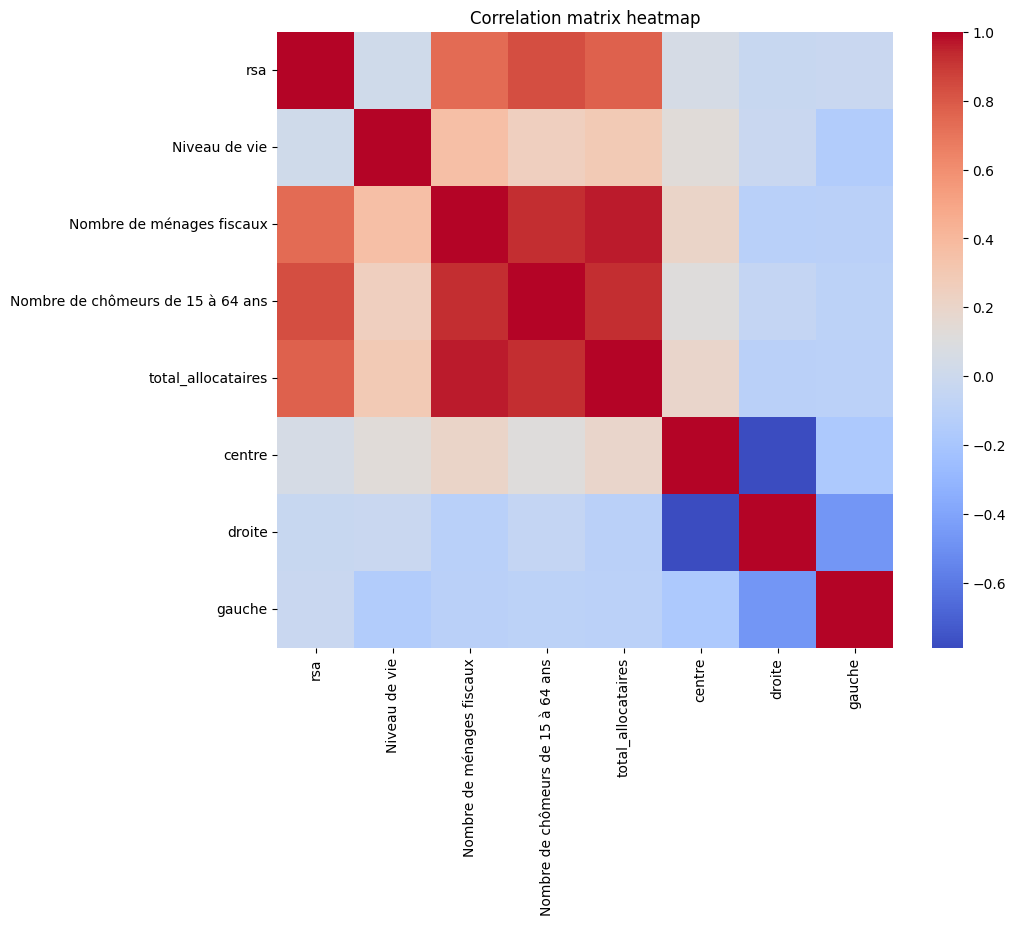

In [206]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 8))
plt.title('Correlation matrix heatmap')
correlation = df.corr()
sns.heatmap(
data = correlation,
square = True,
cmap = 'coolwarm',
ax = ax
)

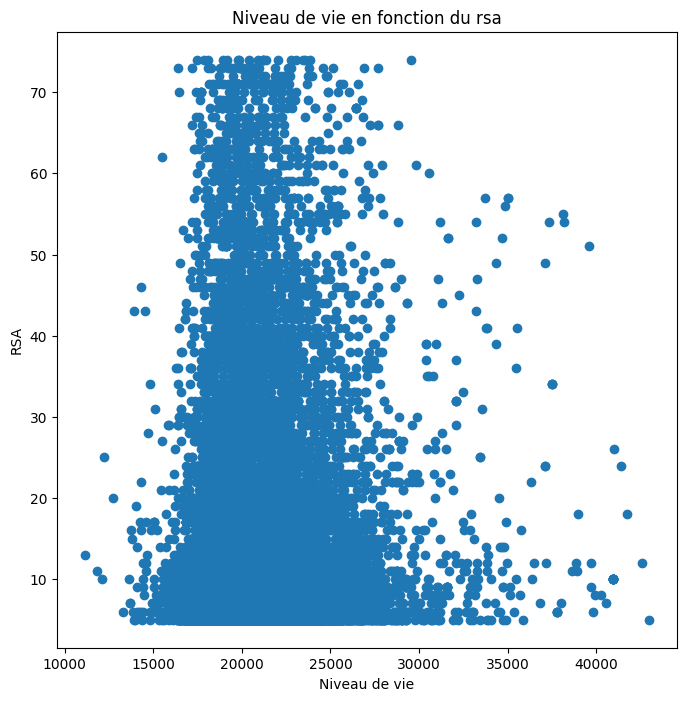

In [207]:
plt.figure(figsize = (8, 8))
plt.title("Niveau de vie en fonction du rsa")
plt.xlabel('Niveau de vie')
plt.ylabel('RSA')
plt.scatter(df["Niveau de vie"], df["rsa"])

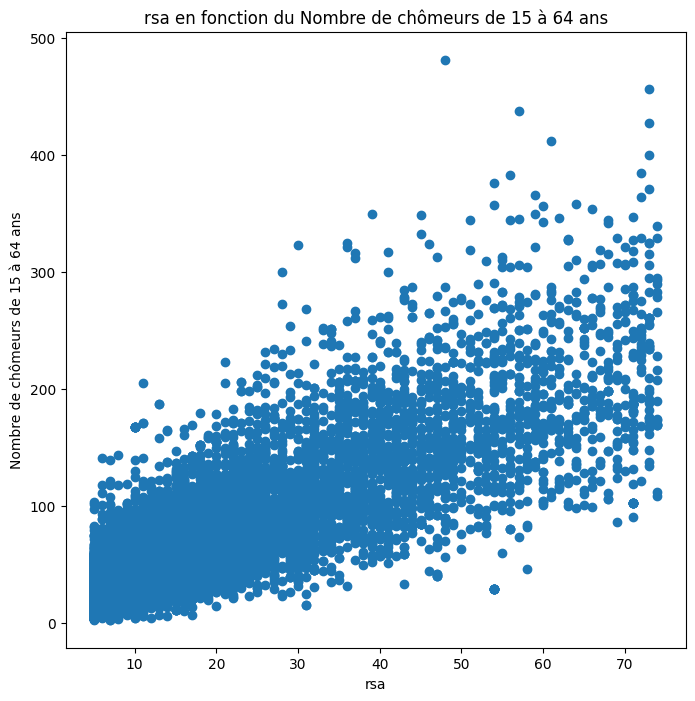

In [208]:
plt.figure(figsize = (8, 8))
plt.title("rsa en fonction du Nombre de chômeurs de 15 à 64 ans")
plt.xlabel('rsa')
plt.ylabel('Nombre de chômeurs de 15 à 64 ans')
plt.scatter(df["rsa"], df["Nombre de chômeurs de 15 à 64 ans"])

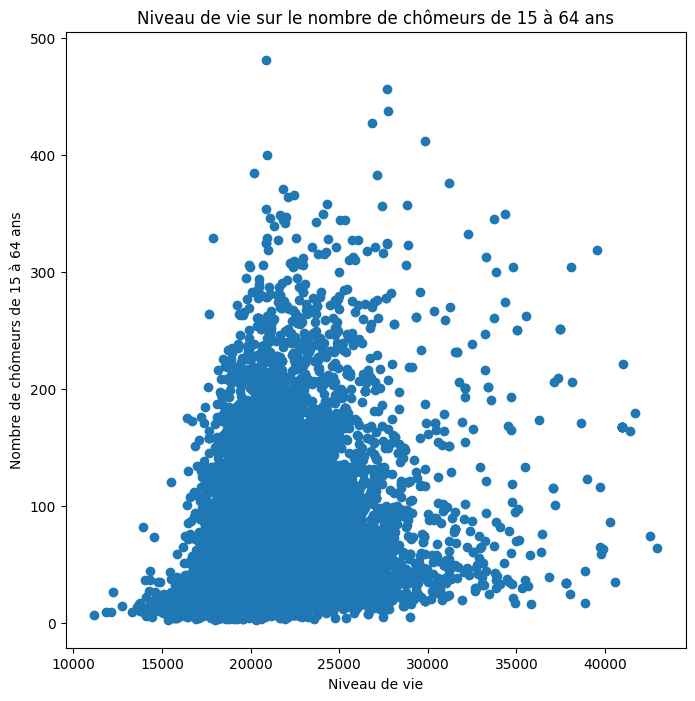

In [209]:
plt.figure(figsize = (8, 8))
plt.title("Niveau de vie sur le nombre de chômeurs de 15 à 64 ans")
plt.xlabel('Niveau de vie')
plt.ylabel('Nombre de chômeurs de 15 à 64 ans')
plt.scatter(df["Niveau de vie"], df["Nombre de chômeurs de 15 à 64 ans"])

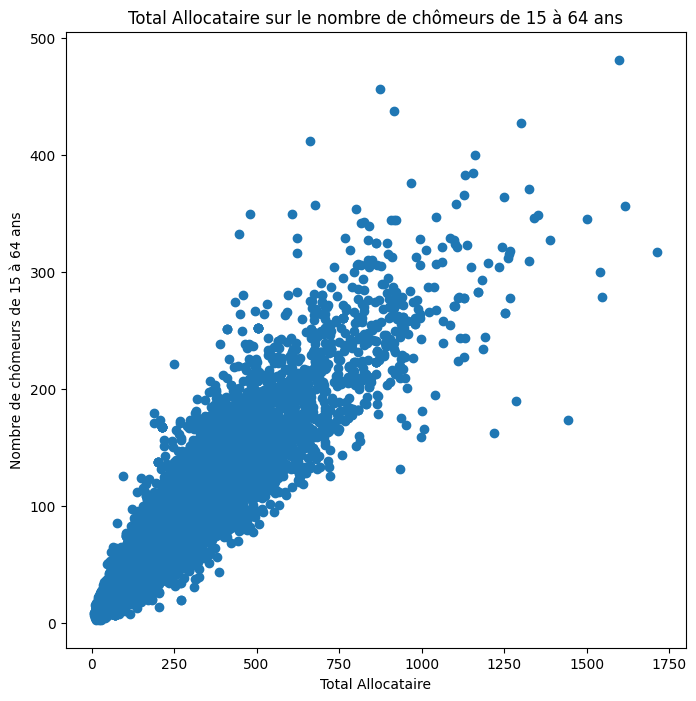

In [210]:
plt.figure(figsize = (8, 8))
plt.title("Total Allocataire sur le nombre de chômeurs de 15 à 64 ans")
plt.xlabel('Total Allocataire')
plt.ylabel('Nombre de chômeurs de 15 à 64 ans')
plt.scatter(df["total_allocataires"], df["Nombre de chômeurs de 15 à 64 ans"])

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

X = df.drop(["gauche", "droite", "centre"], axis=1)
Y = df[["gauche", "droite", "centre"]]

X_resampled, y_resampled = resample(X, Y, n_samples=10000, replace=True, random_state=42)


x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convertir Y en un tableau 1D
y_train = y_train.idxmax(axis=1)
y_test = y_test.idxmax(axis=1)

display(x_test)
display(y_train)
display(y_test)

,rsa,Niveau de vie,Nombre de ménages fiscaux,Nombre de chômeurs de 15 à 64 ans,total_allocataires
5962,19.0,22150.0,778.0,120.422815,341
1212,63.0,22500.0,1714.0,153.428426,499
1414,27.0,21990.0,683.0,66.153051,233
7756,12.0,17320.0,372.0,36.000000,107
6576,16.0,22040.0,621.0,79.723810,228
...,...,...,...,...,...
11935,5.0,22740.0,245.0,21.000000,68
6482,16.0,18180.0,365.0,50.882359,92
2242,22.0,23790.0,423.0,45.394137,133
10488,11.0,23910.0,465.0,50.000000,142


13752    droite
9692     droite
3469     droite
8844     droite
10463    droite
          ...  
5952     droite
6613     centre
15585    droite
9073     droite
6300     droite
Length: 8000, dtype: object

5962     droite
1212     droite
1414     droite
7756     droite
6576     droite
          ...  
11935    droite
6482     droite
2242     droite
10488    droite
13846    gauche
Length: 2000, dtype: object

In [212]:
feature_names = df.drop(["droite", "gauche", "centre"], axis=1).columns.tolist()
feature_names

['rsa',
 'Niveau de vie',
 'Nombre de ménages fiscaux',
 'Nombre de chômeurs de 15 à 64 ans',
 'total_allocataires']

In [213]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


tree_dc = DecisionTreeClassifier(max_depth=5, random_state=42);
tree_dc.fit(x_train, y_train);

y_pred = tree_dc.predict(x_test);
print(accuracy_score(y_test, y_pred))

0.682


In [214]:
from sklearn.ensemble import RandomForestClassifier


rd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_depth=2, random_state=42)
rd_clf.fit(x_train, y_train);

In [215]:
print("Ordre d'importance des features")
for name, score in zip(feature_names, rd_clf.feature_importances_):
    print('%s: %i%%' %(name, int(score*100)))

Ordre d'importance des features
rsa: 1%
Niveau de vie: 21%
Nombre de ménages fiscaux: 39%
Nombre de chômeurs de 15 à 64 ans: 6%
total_allocataires: 30%


In [216]:

from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=10000, learning_rate=0.3, random_state=42)

ada_clf.fit(x_train, y_train)

y_pred_ada = ada_clf.predict(x_test)
print('score Adaboost :' , accuracy_score(y_test, y_pred_ada))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 1, 2, 6, 8],
    'n_estimators': [50, 100, 150, 200, 500, 1000, 1500],
    'learning_rate': [0.1, 0.2, 0.4],
}
# Créer un objet GradientBoostingClassifier avec des valeurs arbitraires pour les hyperparamètres
clf = GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=0.1, n_iter_no_change=5, tol=0.0001)

# Effectuer une recherche de grille
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=2, error_score='raise')
grid_search.fit(x_train, y_train)

# Afficher les meilleures valeurs d'hyperparamètres
print(grid_search.best_params_)

# Entraîner un GradientBoostingClassifier avec les meilleures valeurs d'hyperparamètres
best_clf = GradientBoostingClassifier(**grid_search.best_params_)
best_clf.fit(x_train, y_train)

accuracy = best_clf.score(x_test, y_test)
print(f"Accuracy : {accuracy:.2f}")

In [ ]:

x_new = pd.read_csv("./CleanData/loire.csv")

tendances = x_new['Tendance']

x_new = x_new.drop([
'codgeo',
'Libellé de la commune',
'Nom Gagnant',
'Prénom Gagnant',
'Code du département',
'Libellé du département',
'Code de la commune',
'Prenom','Nom',
'Code Tendance',
'Tendance',
'Parti polititque'], axis=1)


# Effectuer des prédictions sur les nouvelles données
predictions = ada_clf.predict(x_new)

tests = pd.concat([x_new, pd.Series(predictions)], axis=1)
tests = pd.concat([tests, tendances], axis=1)

print(len(x_new))
print(len(predictions))

# Afficher les prédictions
unique_values, counts = np.unique(predictions, return_counts=True)

for value, count in zip(unique_values, counts):
    print("Prediction:", value, "- Count:", count)
display(predictions)
display(tendances)